In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

#from astroquery.esasky import ESASky
#from astroquery.utils import TableList
from astropy.wcs import WCS
#from reproject import reproject_interp

In [2]:
loc = '/scratch3/projects/meerchoirs/jcviljoen/output_'
vers = 'pbcorr' 
loc2 = '/cubes/cube_2/moms/'
name= '_J1059_09_HI.image'
fullname = loc+vers+loc2+vers+name
ext = '.fits'
image = ''
mom0 = '_mom0'
mom1 = '_mom1'
out = 'subcubes/'
outloc = loc+vers+loc2 +out+vers+name

In [3]:
hdu_list = fits.open(fullname+image+ext)
hdu_list.info()
hdu0_list = fits.open(fullname+mom0+ext)
hdu0_list.info()
hdu1_list = fits.open(fullname+mom1+ext)
hdu1_list.info()
data_image = fits.getdata(fullname+image+ext)
header_image = fits.getheader(fullname+image+ext)
data_mom1 = fits.getdata(fullname+mom1+ext)
header_mom1 = fits.getheader(fullname+mom1+ext)
data_mom0 = fits.getdata(fullname+mom0+ext)
header_mom0 = fits.getheader(fullname+mom0+ext)
print(type(data_image))
print(type(data_mom0))
print(data_mom0.shape)
print(type(data_mom1))
print(data_mom1.shape)

Filename: /scratch3/projects/meerchoirs/jcviljoen/output_pbcorr/cubes/cube_2/moms/pbcorr_J1059_09_HI.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     633   (2048, 2048, 189)   float32   
Filename: /scratch3/projects/meerchoirs/jcviljoen/output_pbcorr/cubes/cube_2/moms/pbcorr_J1059_09_HI.image_mom0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   
Filename: /scratch3/projects/meerchoirs/jcviljoen/output_pbcorr/cubes/cube_2/moms/pbcorr_J1059_09_HI.image_mom1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2048, 2048)
<class 'numpy.ndarray'>
(2048, 2048)


In [4]:
def cleanloop(m0,m1,m,l,s):
    for n in range(100):
        for i in range(0, m):
            for j in range(0, l):
                if m0[i,j] != 0.0:
                    flag = False
                    for k in range(1,s):
                        if i < (m-k) and j < (l-k) and i > k and j > k:
                            if m0[i+k,j+k] == 0.0 and m0[i-k,j+k] == 0.0 and m0[i+k,j-k] == 0.0 and m0[i-k,j-k] == 0.0:
                                flag = True
                            if m0[i+k,j] == 0.0 and m0[i-k,j] == 0.0 and m0[i,j-k] == 0.0 and m0[i,j+k] == 0.0:
                                flag = True
                    if flag:
                        m0[i,j] = 0.0
                        m1[i,j] = math.nan  


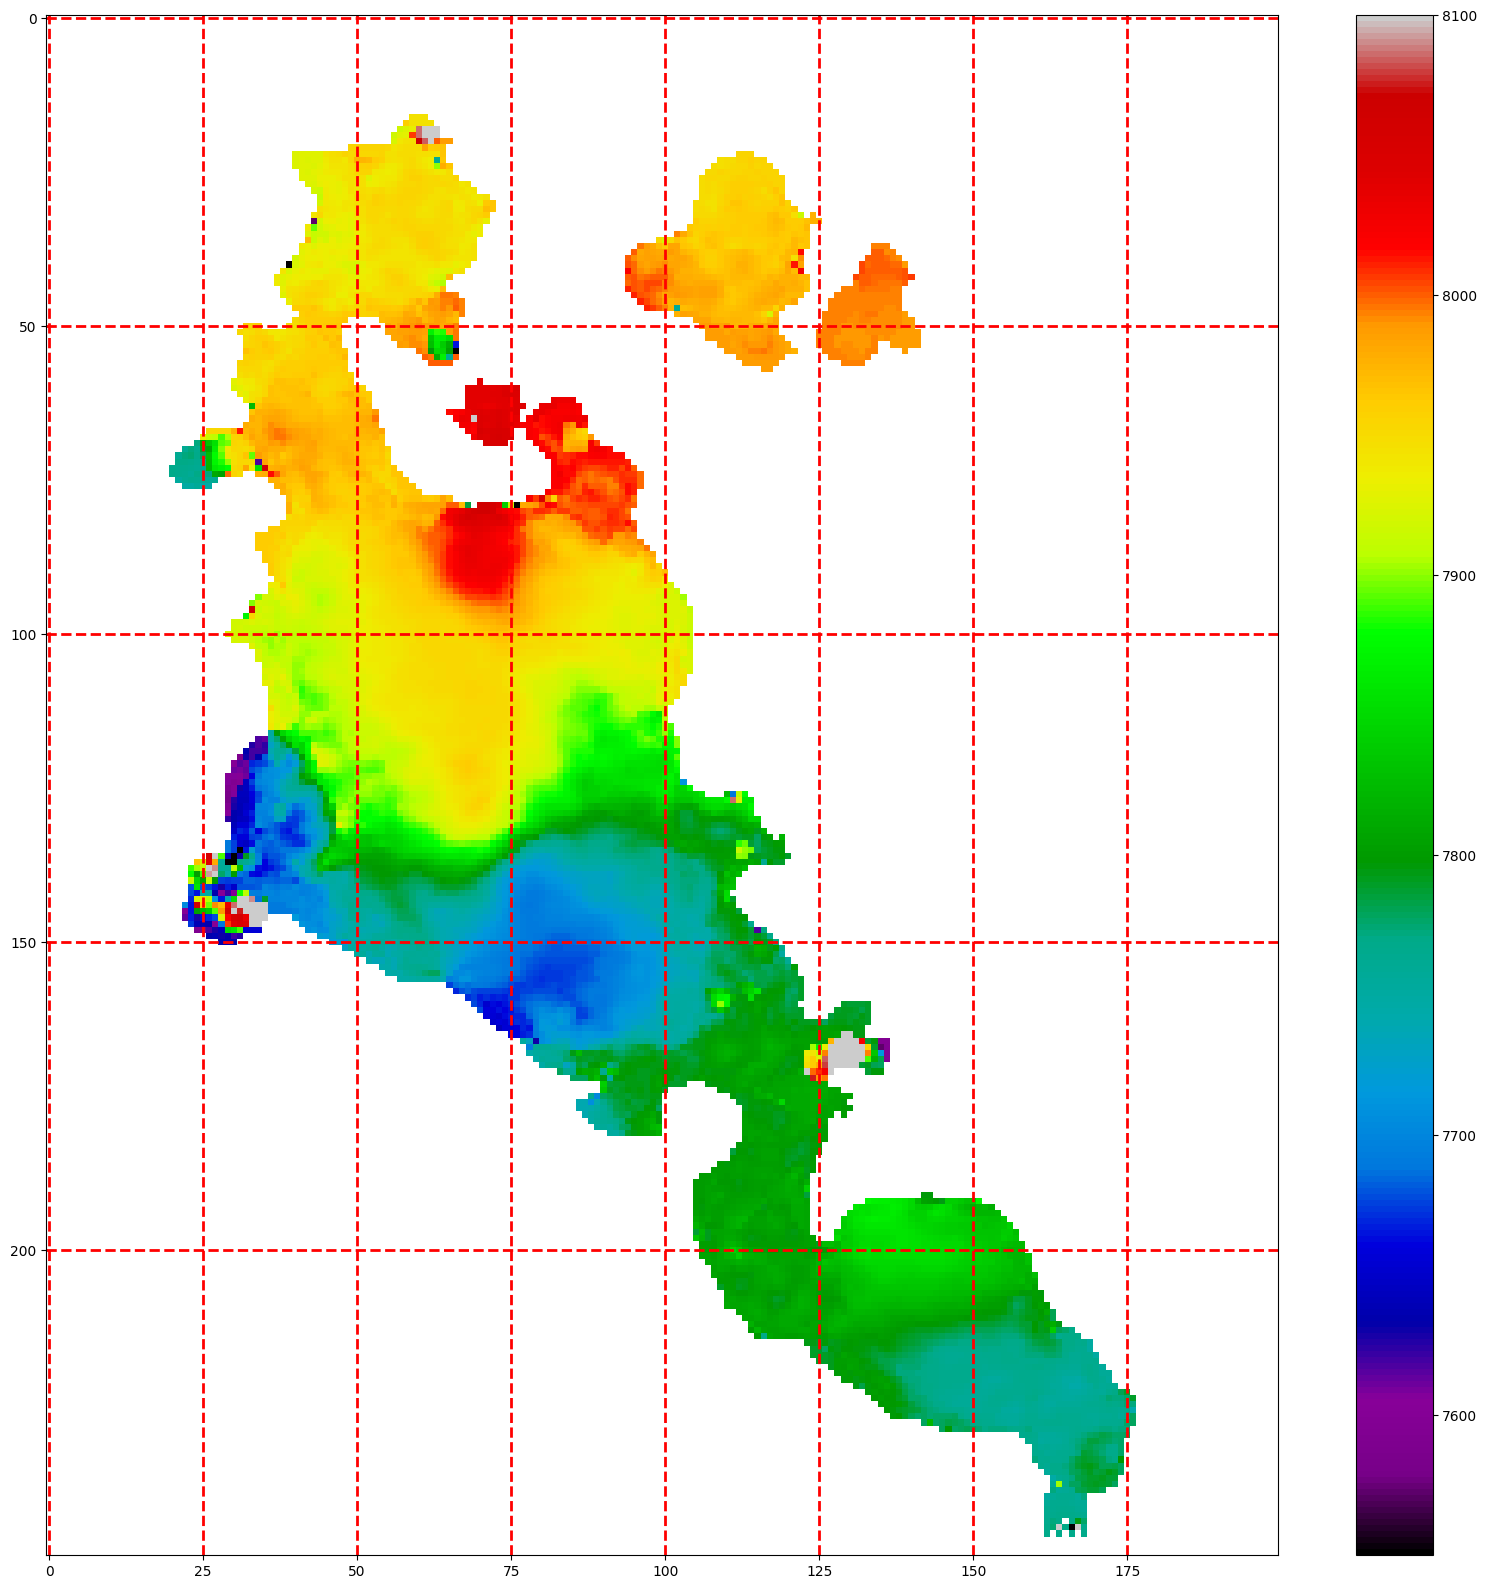

In [5]:
S1237 = data_mom0[890:1140,950:1150]
S1237_mom1 = data_mom1[890:1140,950:1150]
S1237_cube = data_image[:,890:1140,950:1150]
S1237_copy = np.copy(S1237)
S1237_copy_mom1 = np.copy(S1237_mom1)
m = 250
l = 200
cleanloop(S1237_copy,S1237_copy_mom1,m,l,5)
for i in range(0,m):
    for j in range(0,l):
        flag = False
        if j > 150 and j < 175 and i > 200 and i < 250:
            flag = False
        if j < 5:
            flag = True
        if i > 247:
            flag = True
        if j > 197:
            flag = True
                
        if flag:
            S1237_copy[i,j] = 0.0
            S1237_copy_mom1[i,j] = math.nan  
                
plt.figure(figsize = (20,20))
plt.imshow(S1237_copy_mom1, cmap='nipy_spectral', vmin=7550, vmax=8100)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [6]:
hdu = fits.PrimaryHDU(S1237_cube, header=header_image)
hdu.writeto(outloc+image+'_S1237'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S1237_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S1237'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S1237_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S1237'+ext, overwrite=True)

In [7]:
S4 = data_mom0[900:970,1200:1280]
S4_1 = data_mom1[900:970,1200:1280]
S4_cube = data_image[:,900:970,1200:1280]

S4_copy = np.copy(S4)
S4_copy_mom1 = np.copy(S4_1)

m = 70
l = 80
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S4_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S4_copy[i+k,j+k] == 0.0 and S4_copy[i-k,j+k] == 0.0 and S4_copy[i+k,j-k] == 0.0 and S4_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S4_copy[i+k,j] == 0.0 and S4_copy[i-k,j] == 0.0 and S4_copy[i,j-k] == 0.0 and S4_copy[i,j+k] == 0.0:
                            flag = True

                if i < 2:
                    flag  = True
                if j> 74:
                    flag = True
                    
                if flag:
                    S4_copy[i,j] = 0.0
                    S4_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(S4_cube, header=header_image)
hdu.writeto(outloc+image+'_S4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S4_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S4_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S4'+ext, overwrite=True)

In [8]:
S5 = data_mom0[1100:1140,890:940]
S5_1 = data_mom1[1100:1140,890:940]
S5_cube = data_image[:,1100:1140,890:940]

S5_copy = np.copy(S5)
S5_copy_mom1 = np.copy(S5_1)

m = 40
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S5_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S5_copy[i+k,j+k] == 0.0 and S5_copy[i-k,j+k] == 0.0 and S5_copy[i+k,j-k] == 0.0 and S5_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S5_copy[i+k,j] == 0.0 and S5_copy[i-k,j] == 0.0 and S5_copy[i,j-k] == 0.0 and S5_copy[i,j+k] == 0.0:
                            flag = True

                if j <2:
                    flag = True
                    
                if flag:
                    S5_copy[i,j] = 0.0
                    S5_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(S5_cube, header=header_image)
hdu.writeto(outloc+image+'_S5'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S5_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S5'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S5_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S5'+ext, overwrite=True)

In [9]:
S6 = data_mom0[1130:1180,1065:1100]
S6_1 = data_mom1[1130:1180,1065:1100]
S6_cube = data_image[:,1130:1180,1065:1100]

S6_copy = np.copy(S6)
S6_copy_mom1 = np.copy(S6_1)

m = 50
l = 35
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S6_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S6_copy[i+k,j+k] == 0.0 and S6_copy[i-k,j+k] == 0.0 and S6_copy[i+k,j-k] == 0.0 and S6_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S6_copy[i+k,j] == 0.0 and S6_copy[i-k,j] == 0.0 and S6_copy[i,j-k] == 0.0 and S6_copy[i,j+k] == 0.0:
                            flag = True
                    
                if flag:
                    S6_copy[i,j] = 0.0
                    S6_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(S6_cube, header=header_image)
hdu.writeto(outloc+image+'_S6'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S6_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S6'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S6_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S6'+ext, overwrite=True)

In [10]:
S9 = data_mom0[846:851,1247:1255]
S9_1 = data_mom1[846:851,1247:1255]
S9_cube = data_image[:846:851,1247:1255]

S9_copy = np.copy(S9)
S9_copy_mom1 = np.copy(S9_1)

m = 5
l = 8
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S9_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S9_copy[i+k,j+k] == 0.0 and S9_copy[i-k,j+k] == 0.0 and S9_copy[i+k,j-k] == 0.0 and S9_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S9_copy[i+k,j] == 0.0 and S9_copy[i-k,j] == 0.0 and S9_copy[i,j-k] == 0.0 and S9_copy[i,j+k] == 0.0:
                            flag = True


                    
                if flag:
                    S9_copy[i,j] = 0.0
                    S9_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(S9_cube, header=header_image)
hdu.writeto(outloc+image+'_S9'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S9_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S9'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S9_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S9'+ext, overwrite=True)

In [11]:
S10 = data_mom0[830:880,1100:1150]
S10_1 = data_mom1[830:880,1100:1150]
S10_cube = data_image[:,830:880,1100:1150]

S10_copy = np.copy(S10)
S10_copy_mom1 = np.copy(S10_1)

m = 50
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S10_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S10_copy[i+k,j+k] == 0.0 and S10_copy[i-k,j+k] == 0.0 and S10_copy[i+k,j-k] == 0.0 and S10_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S10_copy[i+k,j] == 0.0 and S10_copy[i-k,j] == 0.0 and S10_copy[i,j-k] == 0.0 and S10_copy[i,j+k] == 0.0:
                            flag = True
                            
                if i >=49 or j >= 49:
                    flag = True
                    
                if flag:
                    S10_copy[i,j] = 0.0
                    S10_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(S10_cube, header=header_image)
hdu.writeto(outloc+image+'_S10'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S10_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_S10'+ext, overwrite=True)
hdu = fits.PrimaryHDU(S10_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_S10'+ext, overwrite=True)

In [12]:
N1 = data_mom0[1370:1500,1160:1230]
N1_1 = data_mom1[1370:1500,1160:1230]
N1_cube = data_image[:,1370:1500,1160:1230]

N1_copy = np.copy(N1)
N1_copy_mom1 = np.copy(N1_1)

m = 130
l = 70
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N1_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N1_copy[i+k,j+k] == 0.0 and N1_copy[i-k,j+k] == 0.0 and N1_copy[i+k,j-k] == 0.0 and N1_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N1_copy[i+k,j] == 0.0 and N1_copy[i-k,j] == 0.0 and N1_copy[i,j-k] == 0.0 and N1_copy[i,j+k] == 0.0:
                            flag = True
                    
                if N1_copy_mom1[i,j] > 8400 or N1_copy_mom1[i,j] < 7800:
                    flag = True

                if j<3 or i > 120:
                    flag = True
                    
                if flag:
                    N1_copy[i,j] = 0.0
                    N1_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N1_cube, header=header_image)
hdu.writeto(outloc+image+'_N1'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N1_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N1'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N1_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N1'+ext, overwrite=True)

In [13]:
N2 = data_mom0[550:750,450:650]
N2_1 = data_mom1[550:750,450:650]
N2_cube = data_image[:,550:750,450:650]

N2_copy = np.copy(N2)
N2_copy_mom1 = np.copy(N2_1)

m = 200
l = 200
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N2_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N2_copy[i+k,j+k] == 0.0 and N2_copy[i-k,j+k] == 0.0 and N2_copy[i+k,j-k] == 0.0 and N2_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N2_copy[i+k,j] == 0.0 and N2_copy[i-k,j] == 0.0 and N2_copy[i,j-k] == 0.0 and N2_copy[i,j+k] == 0.0:
                            flag = True

                if j > 175 or j < 5:
                    flag = True
                if i < 25:
                    flag = True
                if j > 100 and i > 120:
                    flag = True
                if i < 75 and j < 75:
                    flag = True
                if i > 75 and i < 85 and j < 80:
                    flag = True
                
                if flag:
                    N2_copy[i,j] = 0.0
                    N2_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N2_cube, header=header_image)
hdu.writeto(outloc+image+'_N2'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N2_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N2'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N2_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N2'+ext, overwrite=True)

In [14]:
N3 = data_mom0[1970:2020,580:630]
N3_1 = data_mom1[1970:2020,580:630]
N3_cube = data_image[:,1970:2020,580:630]

N3_copy = np.copy(N3)
N3_copy_mom1 = np.copy(N3_1)

m = 50
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N3_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N3_copy[i+k,j+k] == 0.0 and N3_copy[i-k,j+k] == 0.0 and N3_copy[i+k,j-k] == 0.0 and N3_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N3_copy[i+k,j] == 0.0 and N3_copy[i-k,j] == 0.0 and N3_copy[i,j-k] == 0.0 and N3_copy[i,j+k] == 0.0:
                            flag = True

                if i > 48:
                    flag = True
                if flag:
                    N3_copy[i,j] = 0.0
                    N3_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N3_cube, header=header_image)
hdu.writeto(outloc+image+'_N3'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N3_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N3'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N3_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N3'+ext, overwrite=True)

In [15]:
N4 = data_mom0[150:190,800:850]
N4_1 = data_mom1[150:190,800:850]
N4_cube = data_image[:,150:190,800:850]

N4_copy = np.copy(N4)
N4_copy_mom1 = np.copy(N4_1)

m = 40
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N4_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N4_copy[i+k,j+k] == 0.0 and N4_copy[i-k,j+k] == 0.0 and N4_copy[i+k,j-k] == 0.0 and N4_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N4_copy[i+k,j] == 0.0 and N4_copy[i-k,j] == 0.0 and N4_copy[i,j-k] == 0.0 and N4_copy[i,j+k] == 0.0:
                            flag = True

                if j >= 39 or i > 49:
                    flag = True
                if flag:
                    N4_copy[i,j] = 0.0
                    N4_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N4_cube, header=header_image)
hdu.writeto(outloc+image+'_N4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N4_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N4'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N4_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N4'+ext, overwrite=True)

In [16]:
N5 = data_mom0[0:40,2000:2048]
N5_1 = data_mom1[0:40,2000:2048]
N5_cube = data_image[:,0:40,2000:2048]

N5_copy = np.copy(N5)
N5_copy_mom1 = np.copy(N5_1)

m = 40
l = 48
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N5_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N5_copy[i+k,j+k] == 0.0 and N5_copy[i-k,j+k] == 0.0 and N5_copy[i+k,j-k] == 0.0 and N5_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N5_copy[i+k,j] == 0.0 and N5_copy[i-k,j] == 0.0 and N5_copy[i,j-k] == 0.0 and N5_copy[i,j+k] == 0.0:
                            flag = True

                if i >= 15 and j <= 5:
                    flag = True
                    
                if flag:
                    N5_copy[i,j] = 0.0
                    N5_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N5_cube, header=header_image)
hdu.writeto(outloc+image+'_N5'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N5_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N5'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N5_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N5'+ext, overwrite=True)

In [17]:
N6 = data_mom0[900:950,410:450]
N6_1 = data_mom1[900:950,410:450]
N6_cube = data_image[:,900:950,410:450]

N6_copy = np.copy(N6)
N6_copy_mom1 = np.copy(N6_1)

m = 50
l = 40
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N6_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N6_copy[i+k,j+k] == 0.0 and N6_copy[i-k,j+k] == 0.0 and N6_copy[i+k,j-k] == 0.0 and N6_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N6_copy[i+k,j] == 0.0 and N6_copy[i-k,j] == 0.0 and N6_copy[i,j-k] == 0.0 and N6_copy[i,j+k] == 0.0:
                            flag = True

                
                if flag:
                    N6_copy[i,j] = 0.0
                    N6_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N6_cube, header=header_image)
hdu.writeto(outloc+image+'_N6'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N6_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N6'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N6_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N6'+ext, overwrite=True)

In [18]:
N7 = data_mom0[1345:1365,1760:1785]
N7_1 = data_mom1[1345:1365,1760:1785]
N7_cube = data_image[:,1345:1365,1760:1785]

N7_copy = np.copy(N7)
N7_copy_mom1 = np.copy(N7_1)

m = 20
l = 25
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N7_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N7_copy[i+k,j+k] == 0.0 and N7_copy[i-k,j+k] == 0.0 and N7_copy[i+k,j-k] == 0.0 and N7_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N7_copy[i+k,j] == 0.0 and N7_copy[i-k,j] == 0.0 and N7_copy[i,j-k] == 0.0 and N7_copy[i,j+k] == 0.0:
                            flag = True

                if N7_copy_mom1[i,j] > 8400:
                    flag = True
                if flag:
                    N7_copy[i,j] = 0.0
                    N7_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N7_cube, header=header_image)
hdu.writeto(outloc+image+'_N7'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N7_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N7'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N7_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N7'+ext, overwrite=True)

In [19]:
N8 = data_mom0[530:570,1010:1060]
N8_1 = data_mom1[530:570,1010:1060]
N8_cube = data_image[:,530:570,1010:1060]

N8_copy = np.copy(N8)
N8_copy_mom1 = np.copy(N8_1)

m = 40
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N8_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N8_copy[i+k,j+k] == 0.0 and N8_copy[i-k,j+k] == 0.0 and N8_copy[i+k,j-k] == 0.0 and N8_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N8_copy[i+k,j] == 0.0 and N8_copy[i-k,j] == 0.0 and N8_copy[i,j-k] == 0.0 and N8_copy[i,j+k] == 0.0:
                            flag = True

                
                if flag:
                    N8_copy[i,j] = 0.0
                    N8_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N8_cube, header=header_image)
hdu.writeto(outloc+image+'_N8'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N8_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N8'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N8_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N8'+ext, overwrite=True)

In [ ]:
N9 = data_mom0[1268:1290,1138:1166]
N9_1 = data_mom1[1268:1290,1138:1166]
N9_cube = data_image[:,1268:1290,1138:1166]

N9_copy = np.copy(N9)
N9_copy_mom1 = np.copy(N9_1)

m = 22
l = 28
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N9_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N9_copy[i+k,j+k] == 0.0 and N9_copy[i-k,j+k] == 0.0 and N9_copy[i+k,j-k] == 0.0 and N9_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N9_copy[i+k,j] == 0.0 and N9_copy[i-k,j] == 0.0 and N9_copy[i,j-k] == 0.0 and N9_copy[i,j+k] == 0.0:
                            flag = True

                
                if flag:
                    N9_copy[i,j] = 0.0
                    N9_copy_mom1[i,j] = math.nan  

hdu = fits.PrimaryHDU(N9_cube, header=header_image)
hdu.writeto(outloc+image+'_N9'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N9_copy, header=header_mom0)
hdu.writeto(outloc+mom0+'_N9'+ext, overwrite=True)
hdu = fits.PrimaryHDU(N9_copy_mom1, header=header_mom1)
hdu.writeto(outloc+mom1+'_N9'+ext, overwrite=True)